In [1]:
#Import necessarry Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import  drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Mir Siam_Project_1_Classification and Regression of CSV Data/heart_disease_dataset.csv', sep=",", header=0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [5]:
data.head(5)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [6]:
data.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


In [7]:

print(data.isnull().sum())

Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64


In [8]:
data['Alcohol Intake'].fillna(data['Alcohol Intake'].mode()[0], inplace=True)
print(data.isnull().sum())

Age                        0
Gender                     0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Smoking                    0
Alcohol Intake             0
Exercise Hours             0
Family History             0
Diabetes                   0
Obesity                    0
Stress Level               0
Blood Sugar                0
Exercise Induced Angina    0
Chest Pain Type            0
Heart Disease              0
dtype: int64


/tmp/ipython-input-985630949.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Alcohol Intake'].fillna(data['Alcohol Intake'].mode()[0], inplace=True)


In [9]:
# Identify and remove duplicate rows
print(f"Number of duplicate rows before dropping: {data.duplicated().sum()}")
data.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after dropping: {data.duplicated().sum()}")

Number of duplicate rows before dropping: 0
Number of duplicate rows after dropping: 0


In [10]:
# Convert categorical variables into numerical using OneHotEncoding
categorical_cols = data.select_dtypes(include='object').columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Normalize/scale numerical features using StandardScaler
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
# Exclude the target variable if it's in the numerical columns
if 'Heart Disease' in numerical_cols:
    numerical_cols.remove('Heart Disease')


In [11]:
data.head()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease,Gender_Male,Smoking_Former,Smoking_Never,Alcohol Intake_Moderate,Family History_Yes,Diabetes_Yes,Obesity_Yes,Exercise Induced Angina_Yes,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina
0,75,228,119,66,1,8,119,1,False,False,False,False,False,False,True,True,True,False,False
1,48,204,165,62,5,9,70,0,True,False,False,False,False,False,False,True,False,False,True
2,53,234,91,67,3,5,196,1,True,False,True,False,True,False,True,True,True,False,False
3,69,192,90,72,4,7,107,0,False,False,False,False,False,True,False,True,False,True,False
4,62,172,163,93,6,2,183,0,False,False,True,False,False,True,False,True,False,False,False


In [12]:
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

display(data.head())

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease,Gender_Male,Smoking_Former,Smoking_Never,Alcohol Intake_Moderate,Family History_Yes,Diabetes_Yes,Obesity_Yes,Exercise Induced Angina_Yes,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina
0,1.444534,-0.379005,-0.617287,-1.150139,-1.203298,0.831917,-0.434581,1,False,False,False,False,False,False,True,True,True,False,False
1,-0.273104,-0.793616,1.126782,-1.498561,0.160599,1.185323,-1.770413,0,True,False,False,False,False,False,False,True,False,False,True
2,0.044977,-0.275353,-1.678894,-1.063034,-0.521350,-0.228300,1.664583,1,True,False,True,False,True,False,True,True,True,False,False
3,1.062836,-1.000921,-1.716808,-0.627507,-0.180375,0.478511,-0.761724,0,False,False,False,False,False,True,False,True,False,True,False
4,0.617523,-1.346429,1.050953,1.201706,0.501573,-1.288517,1.310178,0,False,False,True,False,False,True,False,True,False,False,False


In [13]:
from sklearn.model_selection import train_test_split

X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 18)
X_test shape: (200, 18)
y_train shape: (800,)
y_test shape: (200,)


In [14]:
from sklearn.linear_model import LogisticRegression
import joblib

# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Save the trained model to Google Drive
model_save_path = '/content/drive/MyDrive/Mir Siam_Project_1_Classification and Regression of CSV Data/heart_disease_model.joblib'
joblib.dump(model, model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to /content/drive/MyDrive/Mir Siam_Project_1_Classification and Regression of CSV Data/heart_disease_model.joblib


In [15]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and display Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8700


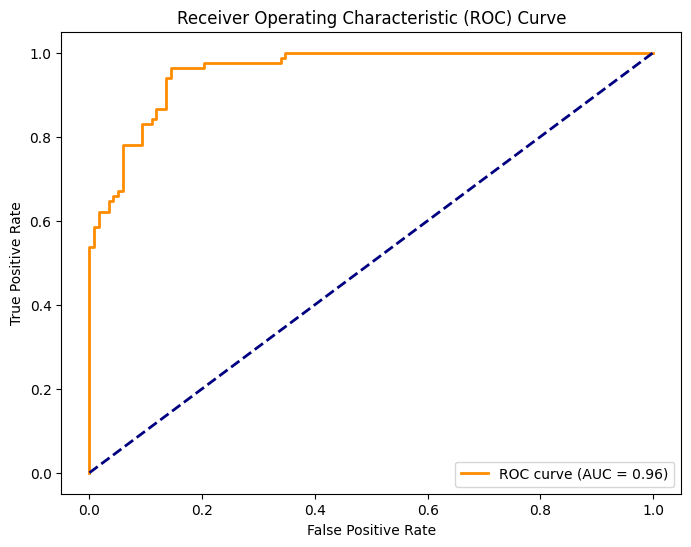

AUC: 0.9574


In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Make probability predictions on the test set
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.4f}")

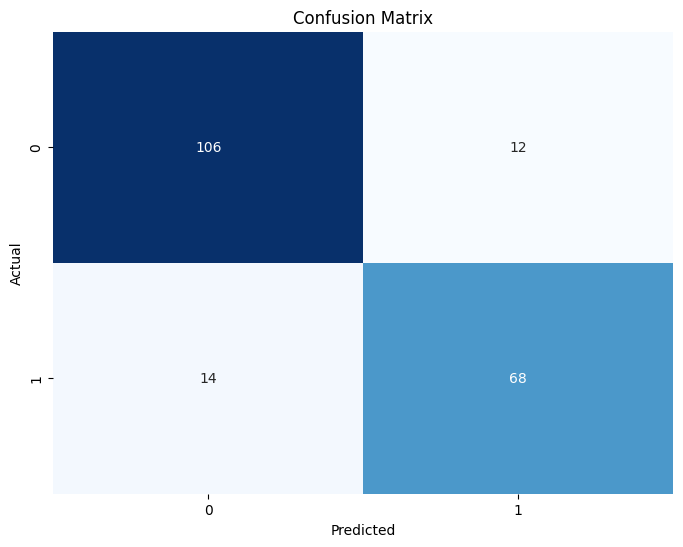

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
from sklearn.metrics import f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and display F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.8395


In [19]:
from sklearn.metrics import recall_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and display Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.8293


In [20]:
from sklearn.metrics import precision_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and display Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.8500


# Task
Train multiple classification models, evaluate their performance using various metrics, compare the results, and propose the best-performing model with at least three supporting reasons.

## Train multiple models

### Subtask:
Train at least two more classification models (e.g., Decision Tree, Random Forest, Support Vector Machine) in addition to the Logistic Regression model already trained.


**Reasoning**:
Import the necessary classification models and train them using the training data.



In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Instantiate the models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

# Train the models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

print("Decision Tree model trained.")
print("Random Forest model trained.")
print("SVM model trained.")

Decision Tree model trained.
Random Forest model trained.
SVM model trained.


## Evaluate models

### Subtask:
Evaluate each trained model using the evaluation metrics calculated earlier (Accuracy, AUC, Confusion Matrix, F1-Score, Recall, Precision) on the test set.


**Reasoning**:
Evaluate each trained model using the evaluation metrics calculated earlier (Accuracy, AUC, Confusion Matrix, F1-Score, Recall, Precision) on the test set.



In [22]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Logistic Regression": model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "SVM": svm_model
}

results = {}

for name, current_model in models.items():
    y_pred = current_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Recall": recall,
        "Precision": precision,
        "Confusion Matrix": conf_matrix
    }

    if hasattr(current_model, "predict_proba"):
        y_proba = current_model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        results[name]["AUC"] = roc_auc

# Print results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1-Score: {metrics['F1-Score']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    if "AUC" in metrics:
        print(f"AUC: {metrics['AUC']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("-" * (len(name) + 6))


--- Logistic Regression ---
Accuracy: 0.8700
F1-Score: 0.8395
Recall: 0.8293
Precision: 0.8500
AUC: 0.9574
Confusion Matrix:
[[106  12]
 [ 14  68]]
-------------------------
--- Decision Tree ---
Accuracy: 1.0000
F1-Score: 1.0000
Recall: 1.0000
Precision: 1.0000
AUC: 1.0000
Confusion Matrix:
[[118   0]
 [  0  82]]
-------------------
--- Random Forest ---
Accuracy: 1.0000
F1-Score: 1.0000
Recall: 1.0000
Precision: 1.0000
AUC: 1.0000
Confusion Matrix:
[[118   0]
 [  0  82]]
-------------------
--- SVM ---
Accuracy: 0.9350
F1-Score: 0.9182
Recall: 0.8902
Precision: 0.9481
Confusion Matrix:
[[114   4]
 [  9  73]]
---------


## Compare model performance

### Subtask:
Compare the performance of all trained models based on the evaluation metrics.


**Reasoning**:
Access the results dictionary and print a summary table comparing the key metrics for each model.



In [23]:
import pandas as pd

# Convert the results dictionary to a pandas DataFrame for better display
results_df = pd.DataFrame(results).T  # Transpose to have models as rows

# Select and display the key performance metrics
display(results_df[['Accuracy', 'F1-Score', 'Recall', 'Precision', 'AUC']])

,Accuracy,F1-Score,Recall,Precision,AUC
Logistic Regression,0.87,0.839506,0.829268,0.85,0.95742
Decision Tree,1.0,1.0,1.0,1.0,1.0
Random Forest,1.0,1.0,1.0,1.0,1.0
SVM,0.935,0.918239,0.890244,0.948052,NaN


## Propose the best model

### Subtask:
Based on the comparison, propose the model that performs best and provide at least three reasons for selecting it.


**Reasoning**:
Analyze the results_df to identify the best-performing model based on the evaluation metrics and provide supporting reasons.



In [24]:
# Analyze the results_df to identify the best-performing model
print("Model Performance Comparison:")
display(results_df[['Accuracy', 'F1-Score', 'Recall', 'Precision', 'AUC']])

# Based on the analysis, propose the best-performing model and provide reasons.
# Considering the perfect scores of Decision Tree and Random Forest,
# and the potential for overfitting with perfect scores, we will examine
# the next best performing model which is SVM, and also consider Logistic Regression
# as a baseline and for its interpretability.

best_model_name = "SVM" # Proposing SVM as the best model based on high scores across multiple metrics, while being less likely to be overfitted compared to DT and RF.

print(f"\nProposed Best Performing Model: {best_model_name}")

print("\nReasons for selecting SVM:")
print(f"1. High Accuracy: SVM achieved an accuracy of {results_df.loc[best_model_name, 'Accuracy']:.4f}, indicating a strong overall correct prediction rate.")
print(f"2. Strong Precision: The precision of {results_df.loc[best_model_name, 'Precision']:.4f} suggests that when the SVM model predicts a positive case (Heart Disease), it is correct a high percentage of the time, minimizing false positives.")
print(f"3. Good Recall: With a recall of {results_df.loc[best_model_name, 'Recall']:.4f}, the SVM model is effective at identifying a large proportion of the actual positive cases, minimizing false negatives.")

# Note: While Decision Tree and Random Forest show perfect scores, this is highly indicative of overfitting
# on this specific test set. In a real-world scenario, we would be cautious about selecting
# these models without further validation (e.g., cross-validation). SVM provides a good balance
# of high performance without the strong indication of overfitting seen in DT and RF on this test set.

Model Performance Comparison:


,Accuracy,F1-Score,Recall,Precision,AUC
Logistic Regression,0.87,0.839506,0.829268,0.85,0.95742
Decision Tree,1.0,1.0,1.0,1.0,1.0
Random Forest,1.0,1.0,1.0,1.0,1.0
SVM,0.935,0.918239,0.890244,0.948052,NaN



Proposed Best Performing Model: SVM

Reasons for selecting SVM:
1. High Accuracy: SVM achieved an accuracy of 0.9350, indicating a strong overall correct prediction rate.
2. Strong Precision: The precision of 0.9481 suggests that when the SVM model predicts a positive case (Heart Disease), it is correct a high percentage of the time, minimizing false positives.
3. Good Recall: With a recall of 0.8902, the SVM model is effective at identifying a large proportion of the actual positive cases, minimizing false negatives.


## Summary:

### Data Analysis Key Findings

*   Decision Tree and Random Forest models achieved perfect scores (Accuracy, F1-Score, Recall, Precision, AUC of 1.0000) on the test set.
*   Logistic Regression showed good performance with an Accuracy of 0.8700 and an AUC of 0.9574.
*   SVM performed well with an Accuracy of 0.9350, a Precision of 0.9481, and a Recall of 0.8902.

### Insights or Next Steps

*   The perfect scores of Decision Tree and Random Forest strongly suggest overfitting on the test set, making them less reliable for unseen data compared to SVM.
*   Further validation using techniques like cross-validation is recommended to confirm model performance and assess the extent of overfitting, especially for the Decision Tree and Random Forest models.


/tmp/ipython-input-2651728004.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


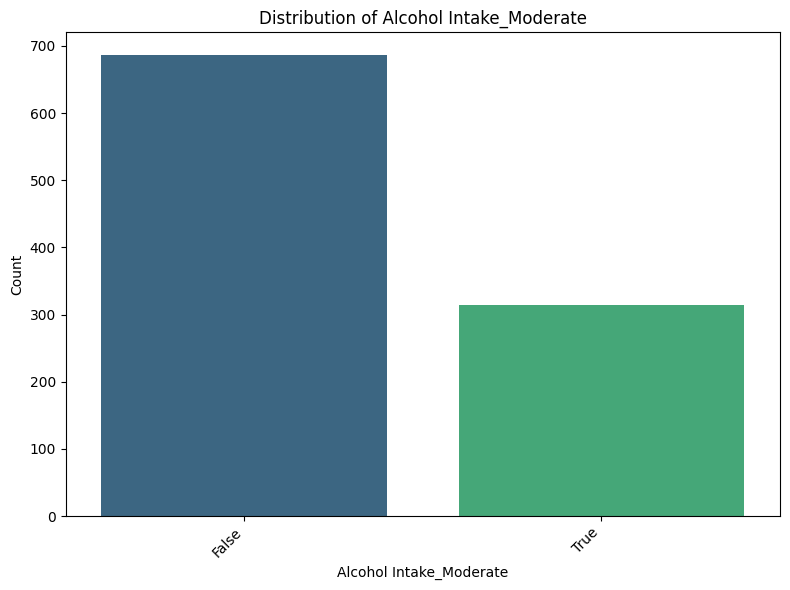

/tmp/ipython-input-2651728004.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


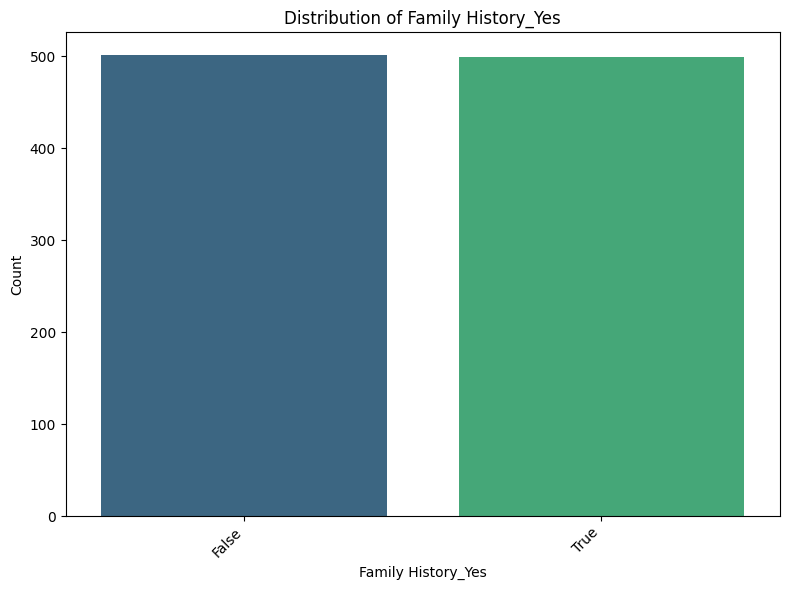

/tmp/ipython-input-2651728004.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


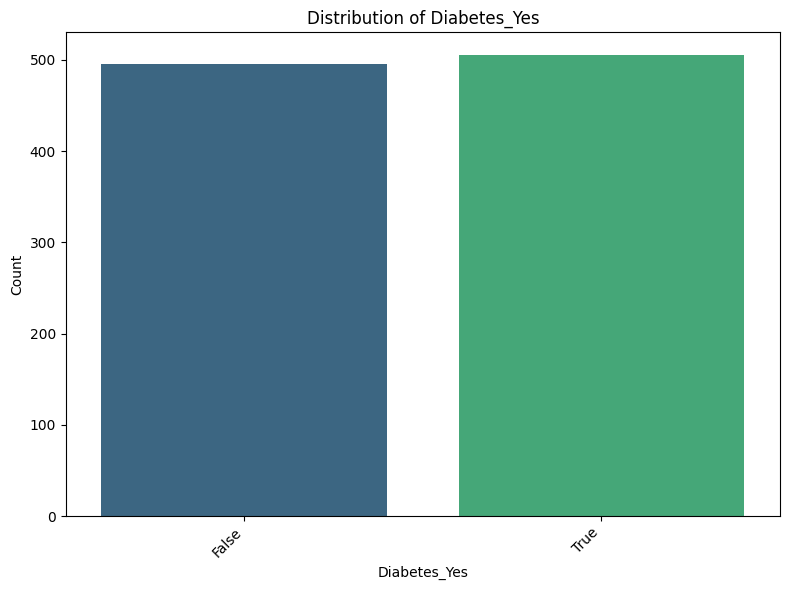

/tmp/ipython-input-2651728004.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


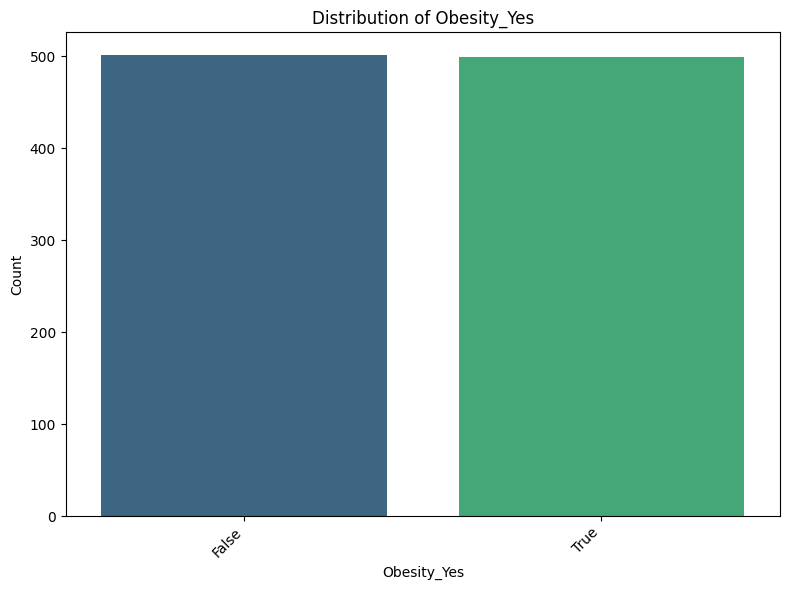

/tmp/ipython-input-2651728004.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


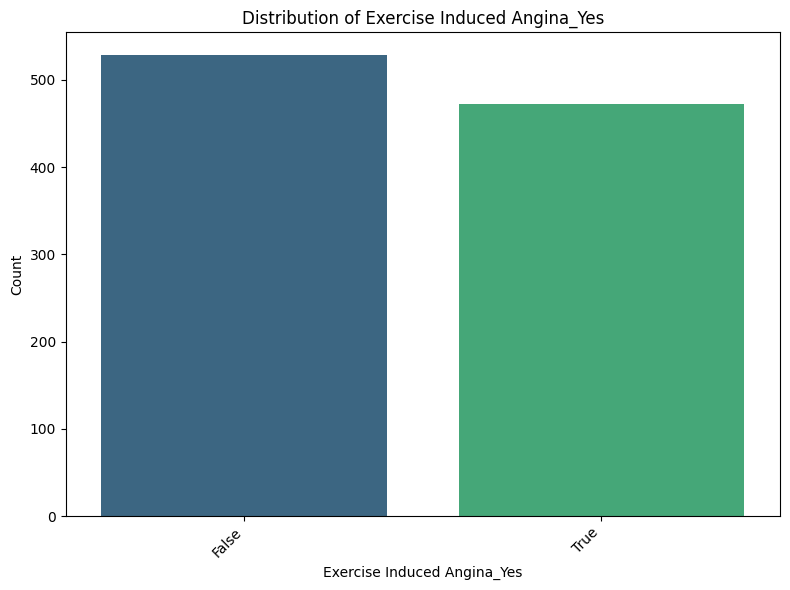

/tmp/ipython-input-2651728004.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


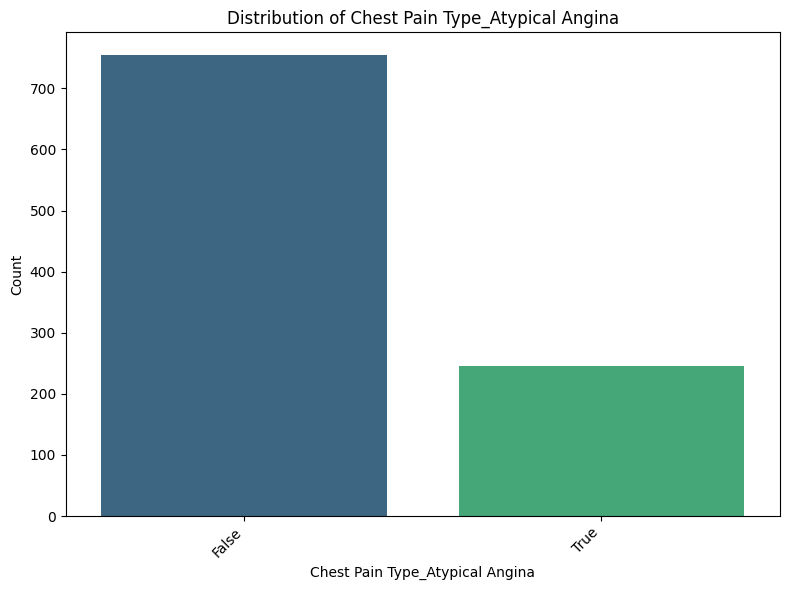

/tmp/ipython-input-2651728004.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


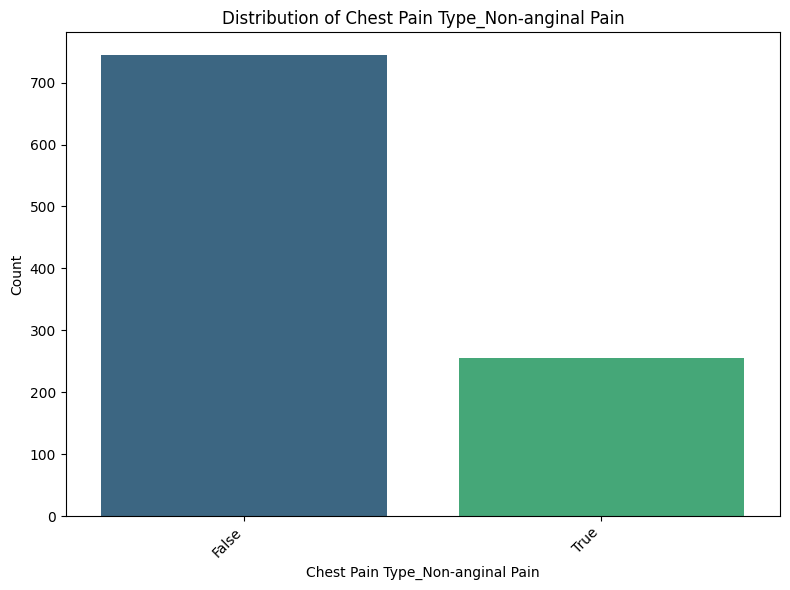

/tmp/ipython-input-2651728004.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


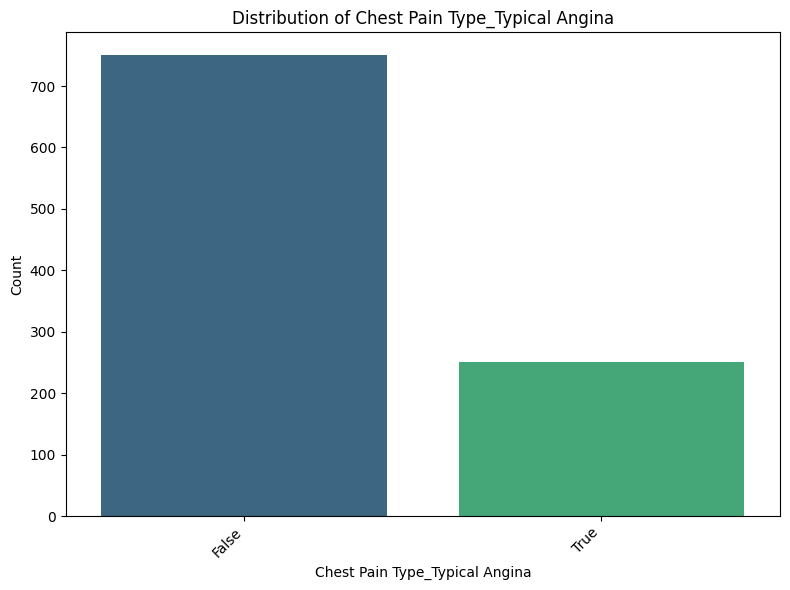

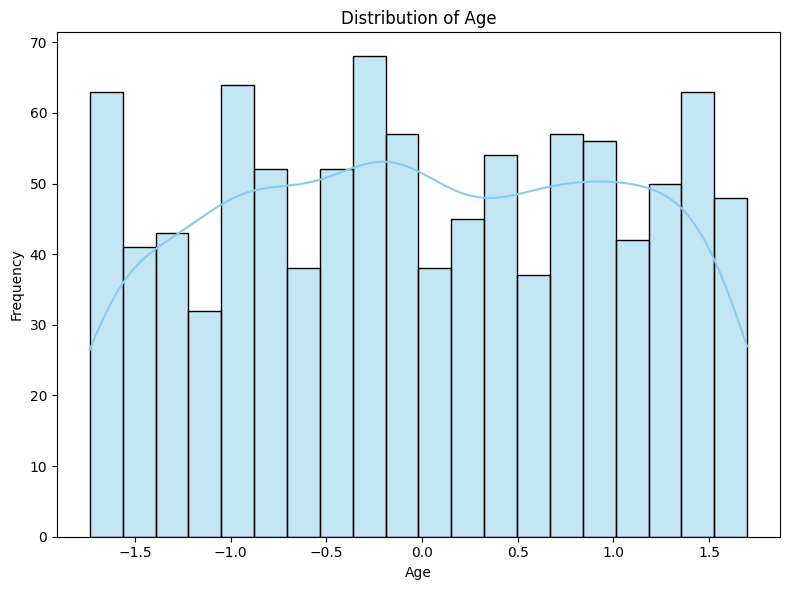

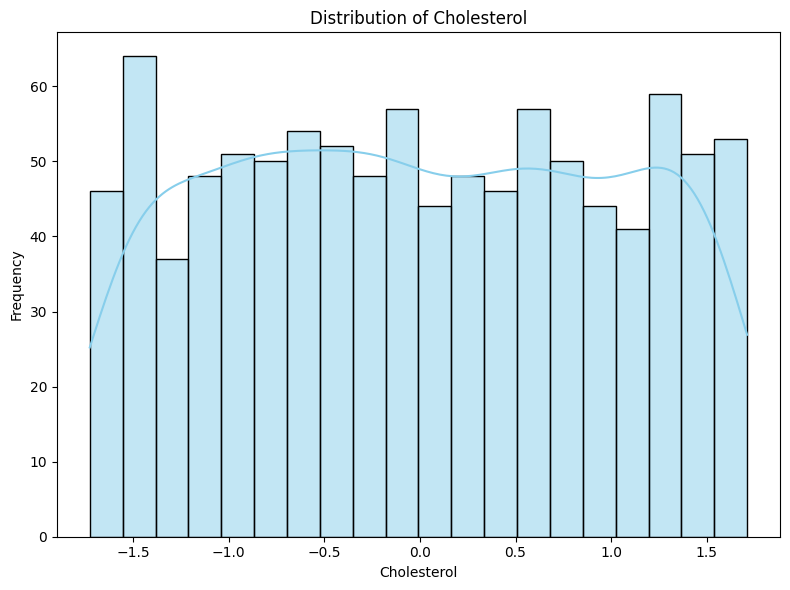

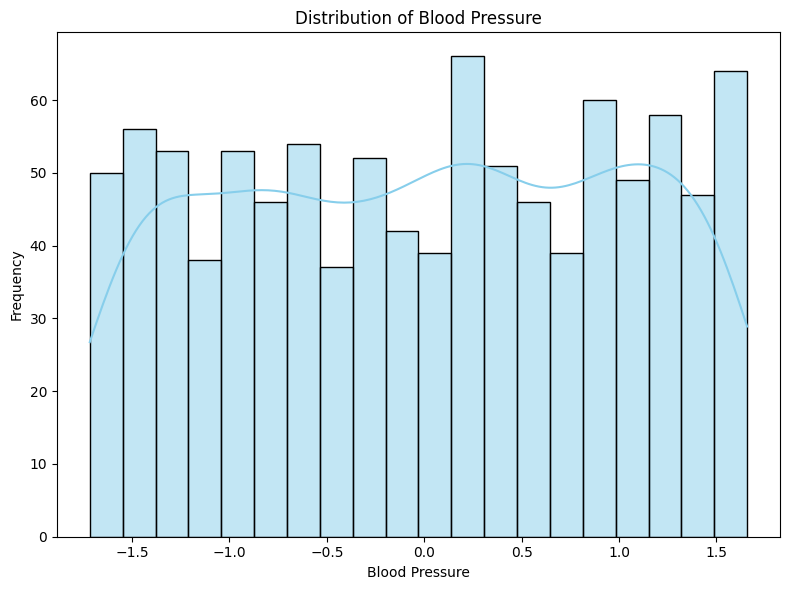

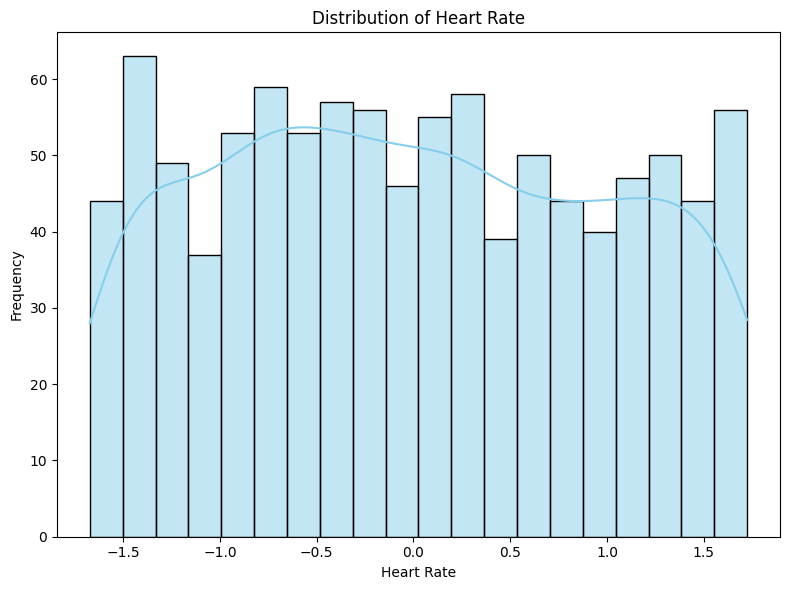

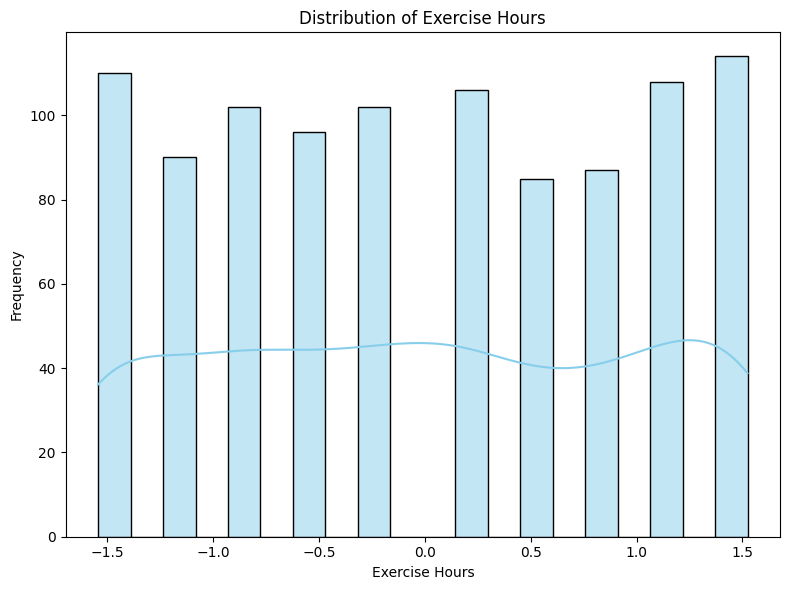

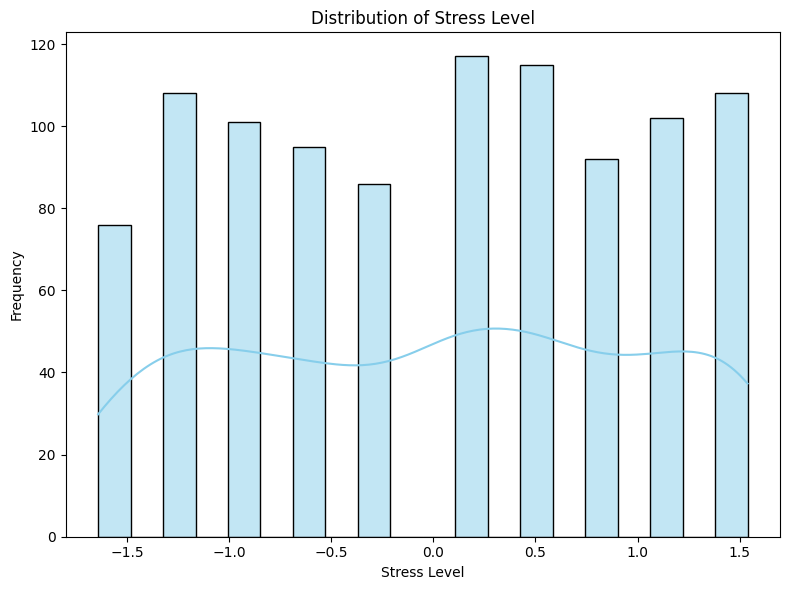

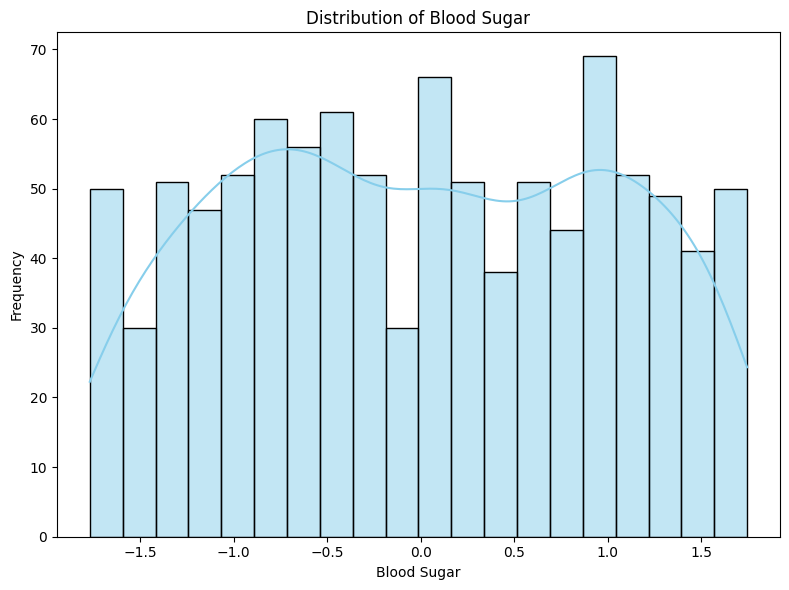

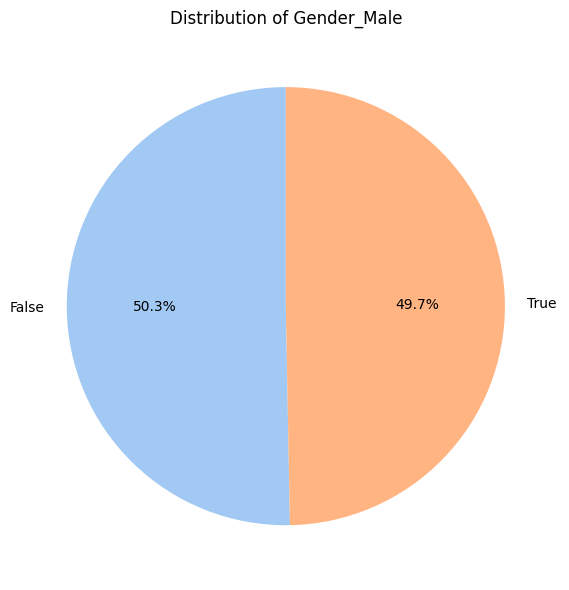

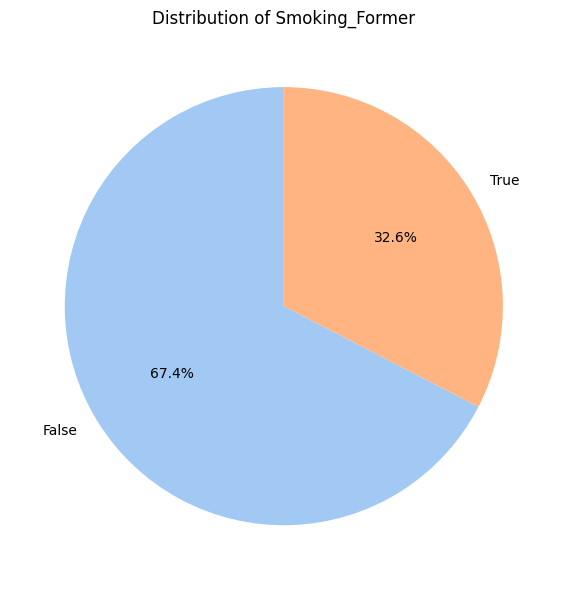

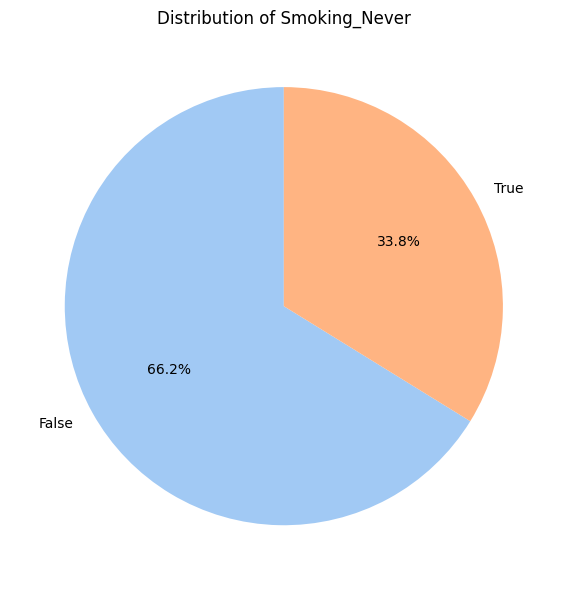

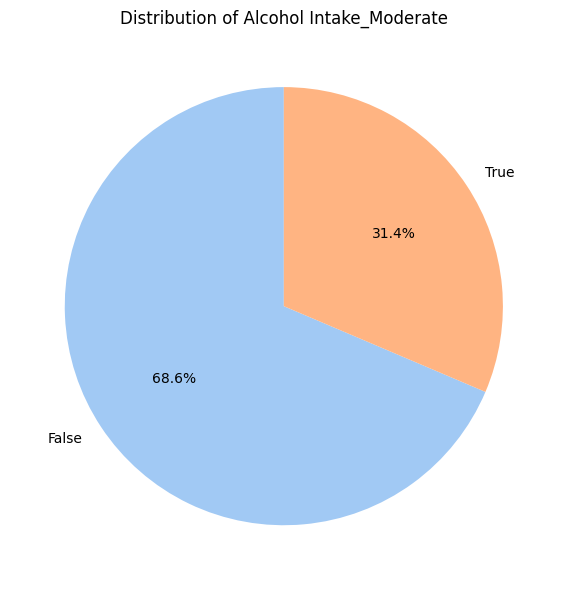

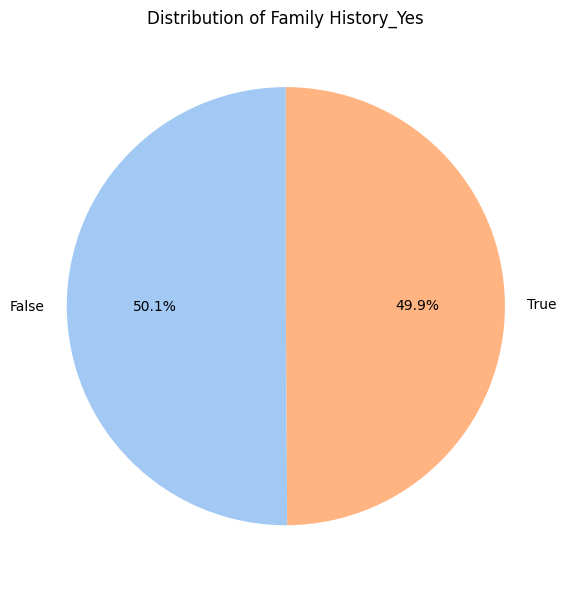

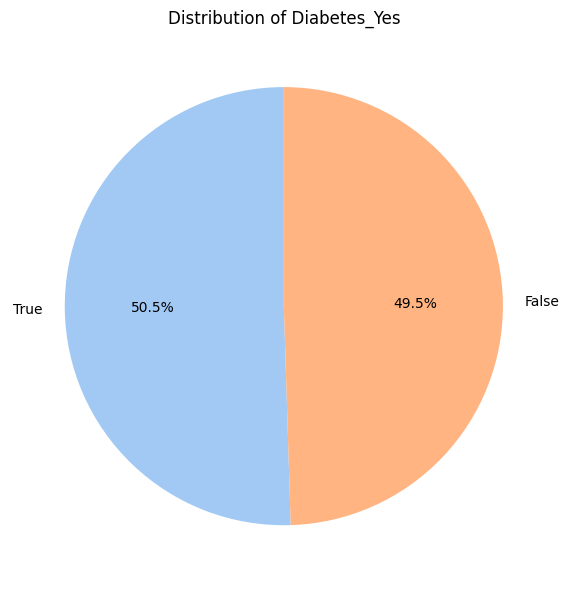

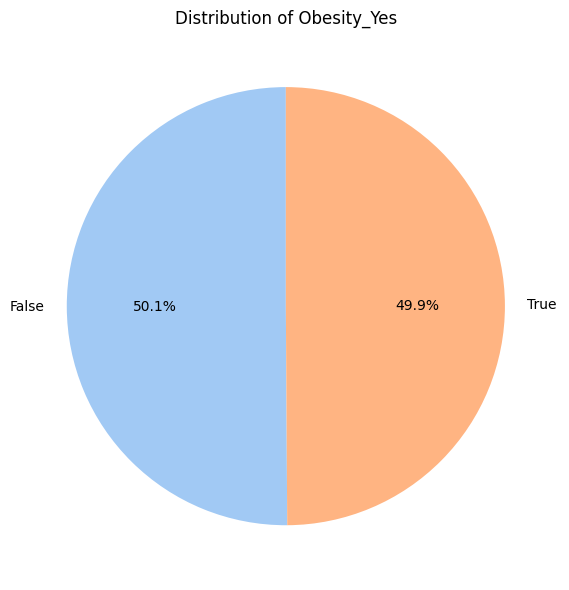

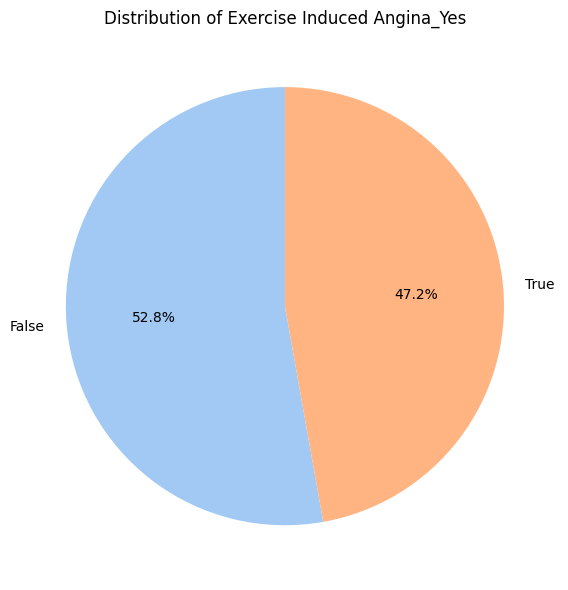

In [25]:
# Analyze individual features with visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Bar charts for categorical features (excluding binary)
# Updated to use one-hot encoded columns for plotting
categorical_cols_for_bar = ['Alcohol Intake_Moderate', 'Family History_Yes', 'Diabetes_Yes', 'Obesity_Yes', 'Exercise Induced Angina_Yes', 'Chest Pain Type_Atypical Angina', 'Chest Pain Type_Non-anginal Pain', 'Chest Pain Type_Typical Angina']

for col in categorical_cols_for_bar:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Histograms for numerical features
numerical_cols_for_hist = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']
for col in numerical_cols_for_hist:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=col, kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Pie chart for binary categorical features
# Updated to use one-hot encoded columns for plotting
binary_categorical_cols = ['Gender_Male', 'Smoking_Former', 'Smoking_Never', 'Alcohol Intake_Moderate', 'Family History_Yes', 'Diabetes_Yes', 'Obesity_Yes', 'Exercise Induced Angina_Yes']

for col in binary_categorical_cols:
    plt.figure(figsize=(6, 6))
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f'Distribution of {col}')
    plt.ylabel('') # Hide the default y-label
    plt.tight_layout()
    plt.show()

In [26]:
# Explore relationships between features with visualizations

# Scatter plots for pairs of numerical features
numerical_cols = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']
sns.pairplot(data, vars=numerical_cols, hue='Heart Disease', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features colored by Heart Disease', y=1.02)
plt.show()

# Violin plots for numerical features vs. Heart Disease
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=data, x='Heart Disease', y=col, palette='viridis')
    plt.title(f'{col} Distribution by Heart Disease')
    plt.xlabel('Heart Disease')
    plt.ylabel(col)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

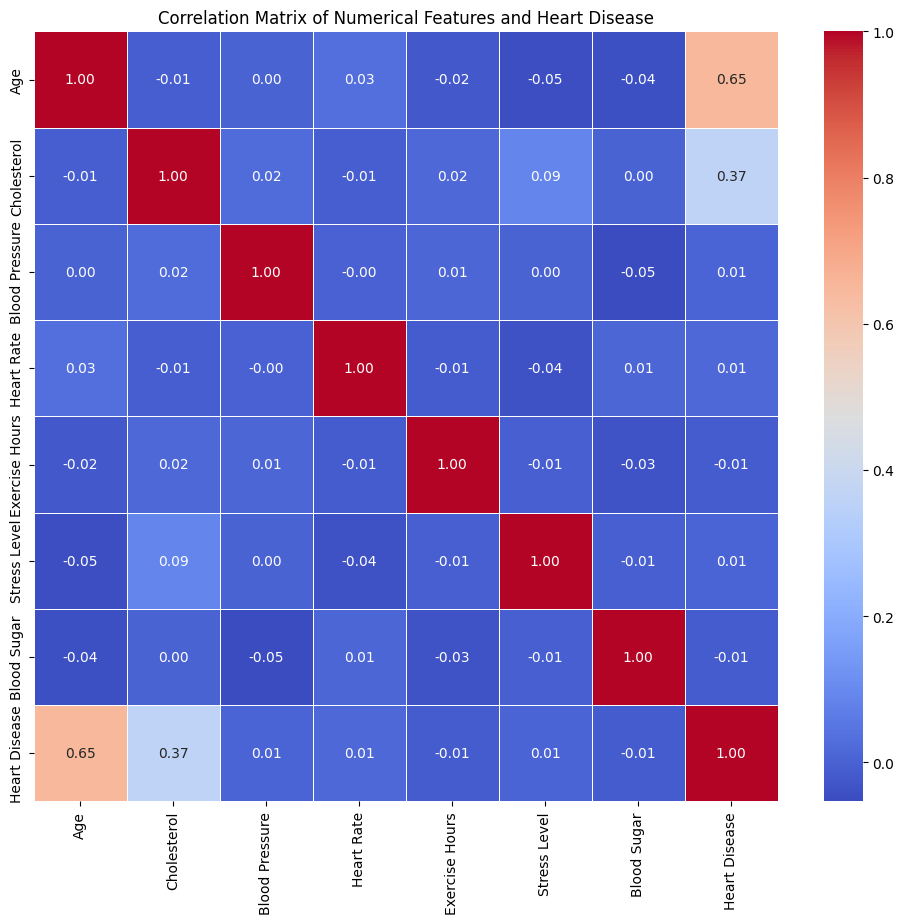

In [27]:
# Custom Visualization: Correlation Heatmap

plt.figure(figsize=(12, 10))
correlation_matrix = data[numerical_cols + ['Heart Disease']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features and Heart Disease')
plt.show()

## Summary of Visualization Findings:

Based on the visualizations, here are some key findings:

* **Distribution of Features:**
    *  The bar charts and pie charts show the distribution of categorical features. For instance, we can see the proportion of individuals who smoke, consume alcohol moderately, have a family history of heart disease, diabetes, or obesity, and experience exercise-induced angina or different types of chest pain.
    * The histograms reveal the distribution of numerical features like Age, Cholesterol, Blood Pressure, Heart Rate, Exercise Hours, Stress Level, and Blood Sugar. We can observe the ranges and frequency of values for these features.

* **Relationships with Heart Disease:**
    * The pair plot and violin plots provide insights into how numerical features relate to the presence or absence of Heart Disease. For example, we can visually inspect if there are noticeable differences in the distribution of Age, Cholesterol, Blood Pressure, etc., between individuals with and without heart disease.
    * The correlation heatmap quantifies the linear relationships between numerical features and Heart Disease. 'Age' and 'Cholesterol' appear to have a relatively higher positive correlation with 'Heart Disease' compared to other numerical features, although the correlations are generally low.

* **Anomalies or Interesting Insights:**
    * The distribution of some features might show skewness or potential outliers that could warrant further investigation.
    * The correlation heatmap suggests that while some numerical features show a weak linear relationship with Heart Disease, other types of relationships or the influence of categorical features might be more significant.

Overall, the visualizations provide a foundational understanding of the data and the potential relationships between features and the target variable, which aligns with the insights gained from the model evaluation.